<a href="https://colab.research.google.com/github/LatiefDataVisionary/data-science-modelling-and-simulation-college-task/blob/main/src/fuzzy_mamdani_case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **1. Instalasi dan Impor Library**

Langkah pertama adalah mengimpor pustaka yang diperlukan dan mendefinisikan rentang nilai (*universe of discourse*) untuk setiap variabel.


In [26]:
pip install scikit-fuzzy

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/base_command.py", line 179, in exc_logging_wrapper
    status = run_func(*args)
             ^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/req_command.py", line 67, in wrapper
    return func(self, options, args)
           ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/commands/install.py", line 447, in run
    conflicts = self._determine_conflicts(to_install)
                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/commands/install.py", line 578, in _determine_conflicts
    return check_install_conflicts(to_install)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/operations/check.py", line 101, in check_install_conflicts
    package_set, _ = create_package_set_from_installed()
              

In [27]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

*   `!pip install scikit-fuzzy`: Perintah ini menggunakan manajer paket `pip` untuk menginstal `scikit-fuzzy` di lingkungan Google Colab. Tanda seru (`!`) di awal menandakan bahwa ini adalah perintah *shell* yang dijalankan, bukan kode Python.
*   `import numpy as np`: Mengimpor library NumPy, yang sangat penting untuk komputasi numerik dan pembuatan rentang data (`np.arange`). `scikit-fuzzy` sangat bergantung pada NumPy.
*   `import skfuzzy as fuzz`: Mengimpor library inti `scikit-fuzzy`.
*   `from skfuzzy import control as ctrl`: Mengimpor modul kontrol dari `scikit-fuzzy`, yang menyediakan alat untuk membangun Sistem Inferensi Fuzzy (Antecedent, Consequent, Rule, ControlSystem).
*   `import matplotlib.pyplot as plt`: Mengimpor Matplotlib untuk visualisasi grafik, seperti fungsi keanggotaan dan hasil defuzzifikasi.

## **2. Definisi Variabel dan Fungsi Keanggotaan (Fuzzifikasi)**


Pada tahap ini, kita mendefinisikan *Universe of Discourse* (rentang nilai) dan fungsi keanggotaan untuk setiap variabel (input dan output).


### **2.1. Variabel Input (Antecedents**)


In [28]:
# Intensitas Cahaya (Lux)
# Rentang: 0 hingga 1000 Lux
cahaya = ctrl.Antecedent(np.arange(0, 1001, 1), 'cahaya')

# Jumlah Kendaraan (kendaraan/menit)
# Rentang: 0 hingga 60 kendaraan/menit
kendaraan = ctrl.Antecedent(np.arange(0, 61, 1), 'kendaraan')

### **2.2. Variabel Output (Consequent)**

In [29]:
# Daya Lampu (%)
# Rentang: 0 hingga 100 %
daya = ctrl.Consequent(np.arange(0, 101, 1), 'daya')

### **2.3. Mendefinisikan Fungsi Keanggotaan**

In [30]:
# Fungsi Keanggotaan untuk 'cahaya'
cahaya['GELAP'] = fuzz.trapmf(cahaya.universe, [0, 0, 200, 400])
cahaya['REDUP'] = fuzz.trimf(cahaya.universe, [200, 500, 800])
cahaya['TERANG'] = fuzz.trapmf(cahaya.universe, [600, 800, 1000, 1000])

# Fungsi Keanggotaan untuk 'kendaraan'
kendaraan['SEPI'] = fuzz.trapmf(kendaraan.universe, [0, 0, 10, 25])
kendaraan['NORMAL'] = fuzz.trimf(kendaraan.universe, [10, 30, 50])
kendaraan['RAMAI'] = fuzz.trapmf(kendaraan.universe, [35, 50, 60, 60])

# Fungsi Keanggotaan untuk 'daya'
daya['MATI'] = fuzz.trapmf(daya.universe, [0, 0, 10, 30])
daya['REDUP'] = fuzz.trimf(daya.universe, [20, 50, 80])
daya['TERANG'] = fuzz.trapmf(daya.universe, [70, 90, 100, 100])

### **2.4. Visualisasi fungsi keanggotaan untuk verifikasi**

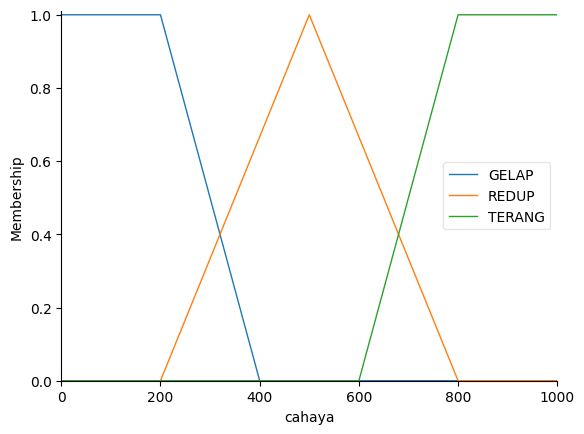

In [31]:
cahaya.view()

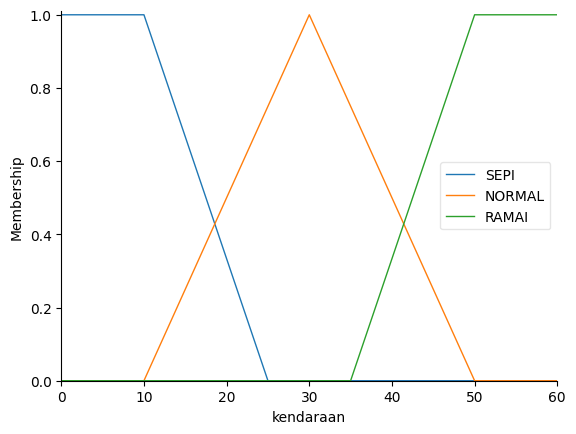

In [32]:
kendaraan.view()

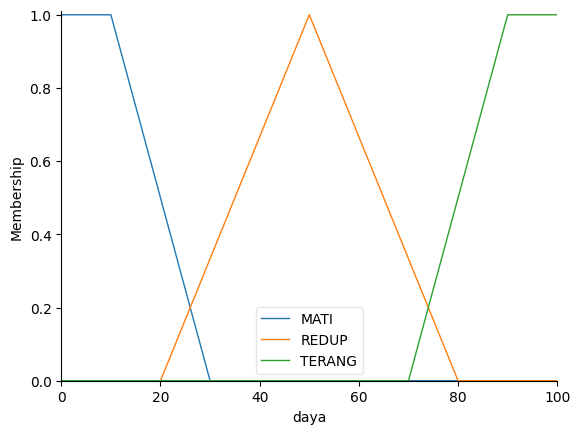

In [33]:
daya.view()

### **Menambahkan Judul pada Grafik (Peningkatan Visual)**

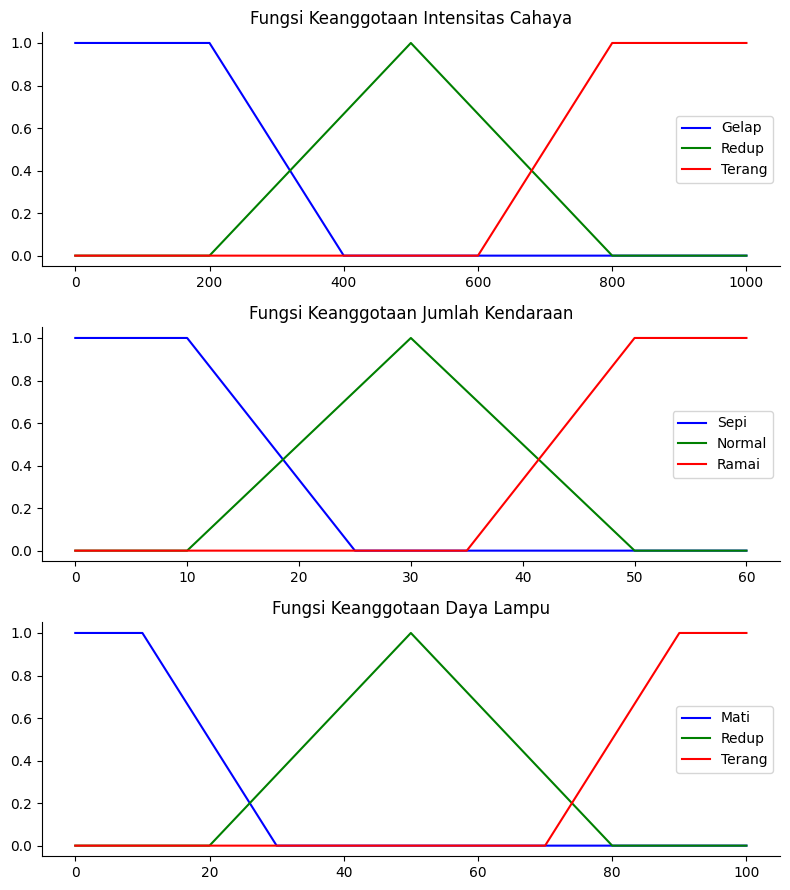

In [34]:
# Visualisasi fungsi keanggotaan untuk verifikasi
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(8, 9))

ax0.plot(cahaya.universe, cahaya['GELAP'].mf, 'b', linewidth=1.5, label='Gelap')
ax0.plot(cahaya.universe, cahaya['REDUP'].mf, 'g', linewidth=1.5, label='Redup')
ax0.plot(cahaya.universe, cahaya['TERANG'].mf, 'r', linewidth=1.5, label='Terang')
ax0.set_title('Fungsi Keanggotaan Intensitas Cahaya')
ax0.legend()

ax1.plot(kendaraan.universe, kendaraan['SEPI'].mf, 'b', linewidth=1.5, label='Sepi')
ax1.plot(kendaraan.universe, kendaraan['NORMAL'].mf, 'g', linewidth=1.5, label='Normal')
ax1.plot(kendaraan.universe, kendaraan['RAMAI'].mf, 'r', linewidth=1.5, label='Ramai')
ax1.set_title('Fungsi Keanggotaan Jumlah Kendaraan')
ax1.legend()

ax2.plot(daya.universe, daya['MATI'].mf, 'b', linewidth=1.5, label='Mati')
ax2.plot(daya.universe, daya['REDUP'].mf, 'g', linewidth=1.5, label='Redup')
ax2.plot(daya.universe, daya['TERANG'].mf, 'r', linewidth=1.5, label='Terang')
ax2.set_title('Fungsi Keanggotaan Daya Lampu')
ax2.legend()

# Sembunyikan sumbu x dan y yang tidak perlu untuk tampilan yang lebih bersih
for ax in [ax0, ax1, ax2]:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()
plt.show()

*   **`ctrl.Antecedent` & `ctrl.Consequent`**: Fungsi ini digunakan untuk membuat variabel input dan output. Parameter pertamanya adalah rentang nilai (`universe`) yang dibuat dengan `np.arange(start, stop, step)`, dan parameter keduanya adalah nama variabel.
*   **`fuzz.trapmf` dan `fuzz.trimf`**: Fungsi-fungsi ini digunakan untuk membuat bentuk fungsi keanggotaan.
    *   `fuzz.trapmf(universe, [a, b, c, d])` membuat bentuk trapesium di mana `a` dan `d` adalah titik-titik dasar, sementara `b` dan `c` adalah titik-titik puncak di mana nilai keanggotaan adalah 1.
    *   `fuzz.trimf(universe, [a, b, c])` membuat bentuk segitiga dengan titik dasar di `a` dan `c`, serta puncak (nilai keanggotaan 1) di `b`.
*   **`.view()`**: Metode ini adalah cara cepat untuk memvisualisasikan variabel fuzzy yang telah kita buat. Ini sangat berguna untuk memastikan bahwa parameter yang kita masukkan sudah benar dan sesuai dengan desain di laporan.

## **3. Mendefinisikan Basis Aturan (Rule Base)**

Di sini, kita menerjemahkan 9 aturan dari Tabel 1 di laporan ke dalam format yang dimengerti oleh scikit-fuzzy

In [12]:
# Mendefinisikan 9 aturan fuzzy
rule1 = ctrl.Rule(cahaya['GELAP'] & kendaraan['SEPI'], daya['REDUP'])
rule2 = ctrl.Rule(cahaya['GELAP'] & kendaraan['NORMAL'], daya['TERANG'])
rule3 = ctrl.Rule(cahaya['GELAP'] & kendaraan['RAMAI'], daya['TERANG'])

rule4 = ctrl.Rule(cahaya['REDUP'] & kendaraan['SEPI'], daya['REDUP'])
rule5 = ctrl.Rule(cahaya['REDUP'] & kendaraan['NORMAL'], daya['REDUP'])
rule6 = ctrl.Rule(cahaya['REDUP'] & kendaraan['RAMAI'], daya['TERANG'])

rule7 = ctrl.Rule(cahaya['TERANG'] & kendaraan['SEPI'], daya['MATI'])
rule8 = ctrl.Rule(cahaya['TERANG'] & kendaraan['NORMAL'], daya['MATI'])
rule9 = ctrl.Rule(cahaya['TERANG'] & kendaraan['RAMAI'], daya['MATI'])

*   **`ctrl.Rule`**: Fungsi untuk mendefinisikan satu aturan IF-THEN.
*   **Antecedents (Bagian IF)**: Kondisi input dihubungkan dengan operator logika.
    *   `&` (DAN/AND)
    *   `|` (ATAU/OR)
    *   `~` (TIDAK/NOT)
    Dalam kasus kita, semua aturan menggunakan `&`.
*   **Consequent (Bagian THEN)**: Hasil output dari aturan tersebut.

## **4. Membuat dan Mensimulasikan Sistem Kontrol**

Langkah terakhir adalah menggabungkan semua aturan menjadi satu sistem kontrol dan kemudian mensimulasikannya dengan input dari studi kasus.


### **4.1. Membuat sistem kontrol**

In [17]:
# Menggabungkan semua aturan ke dalam satu sistem
lamp_control_system = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])

### **4.2. Membuat instansi simulasi dari sistem kontrol**

In [18]:
lamp_simulator = ctrl.ControlSystemSimulation(lamp_control_system)

### **4.3. Memberikan input sesuai studi kasus**

In [19]:
# Input: Intensitas Cahaya = 250 Lux, Jumlah Kendaraan = 40 kendaraan/menit
lamp_simulator.input['cahaya'] = 250
lamp_simulator.input['kendaraan'] = 40

### **4.4. Melakukan komputasi/inferensi**


In [20]:
lamp_simulator.compute()

### **4.5. Mendapatkan dan menampilkan hasil output crisp**


In [21]:
output_daya = lamp_simulator.output['daya']
print(f"Hasil Perhitungan Fuzzy:")
print(f"Daya Lampu Optimal: {output_daya:.2f} %")

Hasil Perhitungan Fuzzy:
Daya Lampu Optimal: 71.39 %


### **4.6. Visualisasi proses defuzzifikasi**


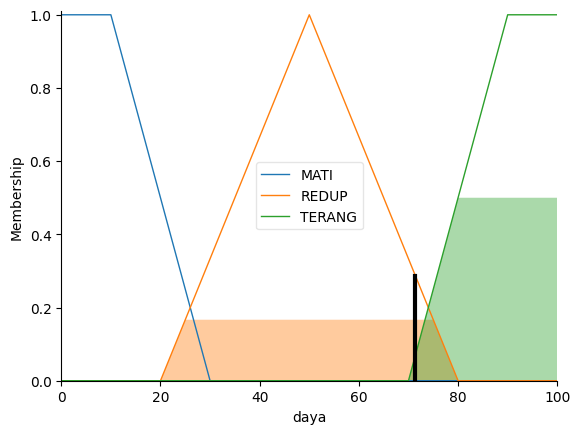

In [22]:
daya.view(sim=lamp_simulator)

*   **`ctrl.ControlSystem([...])`**: Membuat sebuah "otak" sistem dengan mengumpulkan semua aturan yang telah kita buat ke dalam sebuah list.
*   **`ctrl.ControlSystemSimulation(...)`**: Membuat sebuah "instance" atau simulator dari sistem kontrol tersebut. Simulator inilah yang akan menerima input dan melakukan perhitungan.
*   **`lamp_simulator.input[...] = ...`**: Memberikan nilai *crisp* pada variabel input.
*   **`lamp_simulator.compute()`**: Perintah inti yang menjalankan seluruh proses inferensi Mamdani: fuzzifikasi input, evaluasi aturan (aplikasi fungsi implikasi), agregasi output (komposisi aturan), dan defuzzifikasi.
*   **`lamp_simulator.output['daya']`**: Mengambil hasil akhir berupa nilai *crisp* setelah proses defuzzifikasi dengan metode **Centroid** (metode default di `scikit-fuzzy`).
*   **`daya.view(sim=lamp_simulator)`**: Visualisasi yang sangat kuat ini akan menggambar:
    1.  Bentuk-bentuk fungsi keanggotaan dari variabel `daya` (`MATI`, `REDUP`, `TERANG`).
    2.  Area berwarna biru yang merepresentasikan **himpunan fuzzy hasil agregasi**.
    3.  Garis vertikal merah yang menunjukkan titik **Centroid** (hasil `z*`).